In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests as r

In [37]:
def crawl_query(query):
    try:#Exception handling 
        req = r.get(f"https://www.bing.com/search?q={query}",
                     headers = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'})
        result_str = '<html><table style="border: none;">' #Initializing the HTML code for displaying search results
        if req.status_code == 200: #Status code 200 indicates a successful request
            bs = BeautifulSoup(req.content, features="html.parser") #converting the content/text returned by request to a BeautifulSoup object
            print(bs)
            search_result = bs.find_all("li", class_="b_algo") #'b_algo' is the class of the list object which represents a single result
            print(search_result)
            search_result = [str(i).replace("<strong>","") for i in search_result] #removing the <strong> tag
            search_result = [str(i).replace("</strong>","") for i in search_result] #removing the </strong> tag
            result_df = pd.DataFrame() #Initializing the data frame that stores the results

            for n,i in enumerate(search_result): #iterating through the search results
                individual_search_result = BeautifulSoup(i, features="html.parser") #converting individual search result into a BeautifulSoup object
                h2 = individual_search_result.find('h2') #Finding the title of the individual search result
                href = h2.find('a').get('href') #title's URL of the individual search result
                cite = f'{href[:50]}...' if len(href) >= 50 else href # cite with first 20 chars of the URL
                url_txt = h2.find('a').text #title's text of the individual search result
                #In a few cases few individual search results doesn't have a description. In such cases the description would be blank
                description = "" if individual_search_result.find('p') is None else individual_search_result.find('p').text
                #Appending the result data frame after processing each individual search result
                result_df = result_df.append(pd.DataFrame({"Title": url_txt, "URL": href, "Description": description}, index=[n]))
                count_str = f'<b style="font-size:20px;">Bing Search returned {len(result_df)} results</b>'
                ########################################################
                ######### HTML code to display search results ##########
                ########################################################
                result_str += f'<tr style="border: none;"><h3><a href="{href}" target="_blank">{url_txt}</a></h3></tr>'+\
                f'<tr style="border: none;"><strong style="color:green;">{cite}</strong></tr>'+\
                f'<tr style="border: none;">{description}</tr>'+\
                f'<tr style="border: none;"><td style="border: none;"></td></tr>'
            result_str += '</table></html>'

        #if the status code of the request isn't 200, then an error message is displayed along with an empty data frame        
        else:
            result_df = pd.DataFrame({"Title": "", "URL": "", "Description": ""}, index=[0])
            result_str = '<html></html>'
            count_str = '<b style="font-size:20px;">Looks like an error!!</b>'

    #if an exception is raised, then an error message is displayed along with an empty data frame
    except:
        result_df = pd.DataFrame({"Title": "", "URL": "", "Description": ""}, index=[0])
        result_str = '<html></html>'
        count_str = '<b style="font-size:20px;">Looks like an error!!</b>'
    return result_df


In [38]:
#st.markdown('<h1 style="background-color: gainsboro; padding-left: 10px; padding-bottom: 20px;">Search Engine Scraper</h1>', unsafe_allow_html=True)
# query = st.text_input('', help='Enter the search string and hit Enter/Return')
query='réparation grille pain SEB comment faire'
query = query.replace(" ", "+") #replacing the spaces in query result with +

<!DOCTYPE html>
<html dir="ltr" lang="fr" xml:lang="fr" xmlns="http://www.w3.org/1999/xhtml" xmlns:web="http://schemas.live.com/Web/"><script nonce="PyOehWcOTaj0IlA49o/OTfPoeYVyy1CYeih8ny+9KOU=" type="text/javascript">//<![CDATA[
si_ST=new Date
//]]></script><head><!--pc--><title>réparation grille pain SEB comment faire - Recherche</title><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="origin-when-cross-origin" name="referrer"/><meta content="La recherche intelligente de Bing facilite la recherche rapide et vous récompense." property="og:description"/><meta content="Bing" property="og:site_name"/><meta content="réparation grille pain SEB comment faire - Bing" property="og:title"/><meta content="https://www.bing.com/search?q=réparation+grille+pain+SEB+comment+faire" property="og:url"/><meta content="570810223073062" property="fb:app_id"/><meta content="http://www.bing.com/sa/simg/facebook_sharing_5.png" property="og:image"/><meta content="website" prop
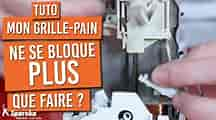
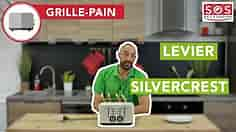
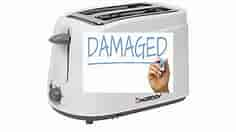
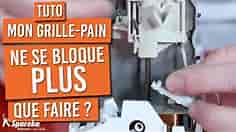

In [39]:
df=crawl_query(query)

In [40]:
df

,Title,URL,Description
0,Comment réparer mon Grille Pain moi-même ? Gui...,https://www.spareka.fr/comment-reparer/electro...,WebGuide de réparation de panne pour grille-pa...
1,"Mon grille pain ne se bloque plus, que faire -...",https://www.youtube.com/watch?v=HhvMarglKjs,Web28 sept. 2020 · Nous vous montrons dans ce ...
2,Réparateur électroménager - Seb,https://www.seb.fr/service-clients/garantie-et...,WebOÙ FAIRE RÉPARER MON PRODUIT SEB ? Votre pr...
3,Réparer . Grille-pain Seb - CommentReparer.com,https://www.commentreparer.com/reparations/55-...,Web6 sept. 2016 · Demander une réparation Pas ...
